In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\python.practice\dataset_practice\CWC23_all_innings (1).csv")

In [3]:
df.head(2)

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.75,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.75,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [5]:
df.duplicated().sum()

np.int64(2)

In [6]:
df.shape

(1408, 20)

In [7]:
df.columns

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins'],
      dtype='object')

In [8]:
df.isnull().sum()[df.isnull().sum()>0]

wkts       846
overs      846
mdns       846
econ       846
4s         562
6s         562
sr         562
not_out    562
mins       562
dtype: int64

# 1. Team Performance 

### Explore Team-wise performance

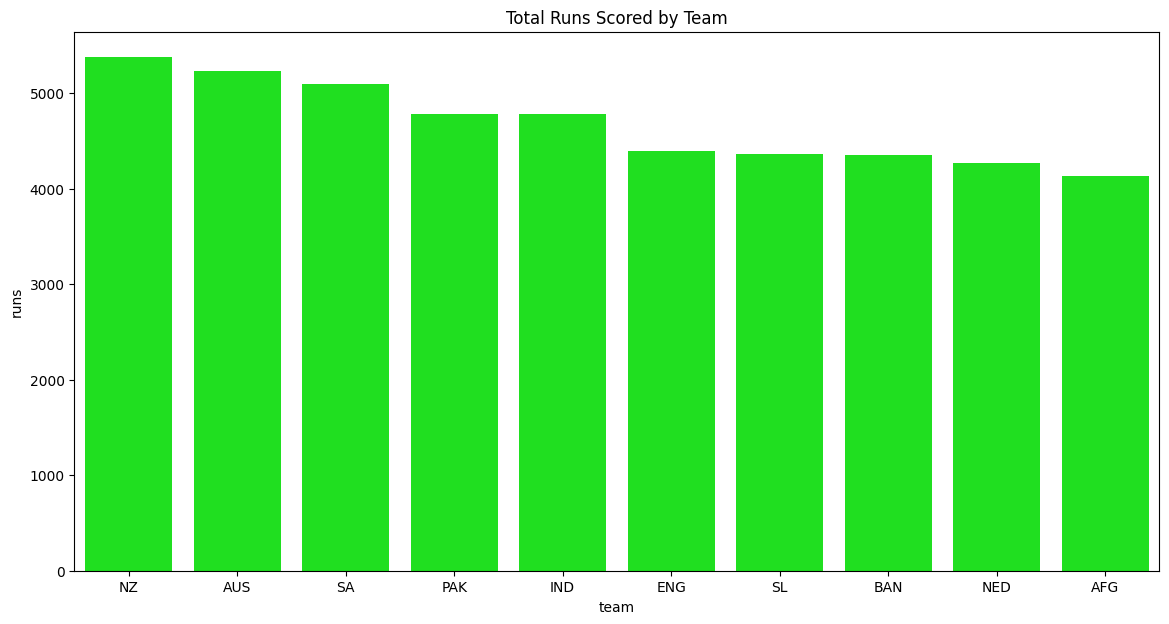

In [9]:
team_runs = df.groupby('team')['runs'].sum().nlargest(10).reset_index()

plt.figure(figsize=(14,7))
sns.barplot(x='team', y = 'runs', data = team_runs,color='lime')
plt.title('Total Runs Scored by Team')
plt.show()


In [10]:
wkts_taken = df.groupby(['team']).wkts.sum().nlargest(10)

fig_wkts_taken = px.bar(wkts_taken,title='Total Wicket taken by Team',color_discrete_sequence=['red'])
fig_wkts_taken.update_xaxes(title_text= 'Teams')
fig_wkts_taken.update_yaxes(title_text= 'Wickets')
fig_wkts_taken.show()

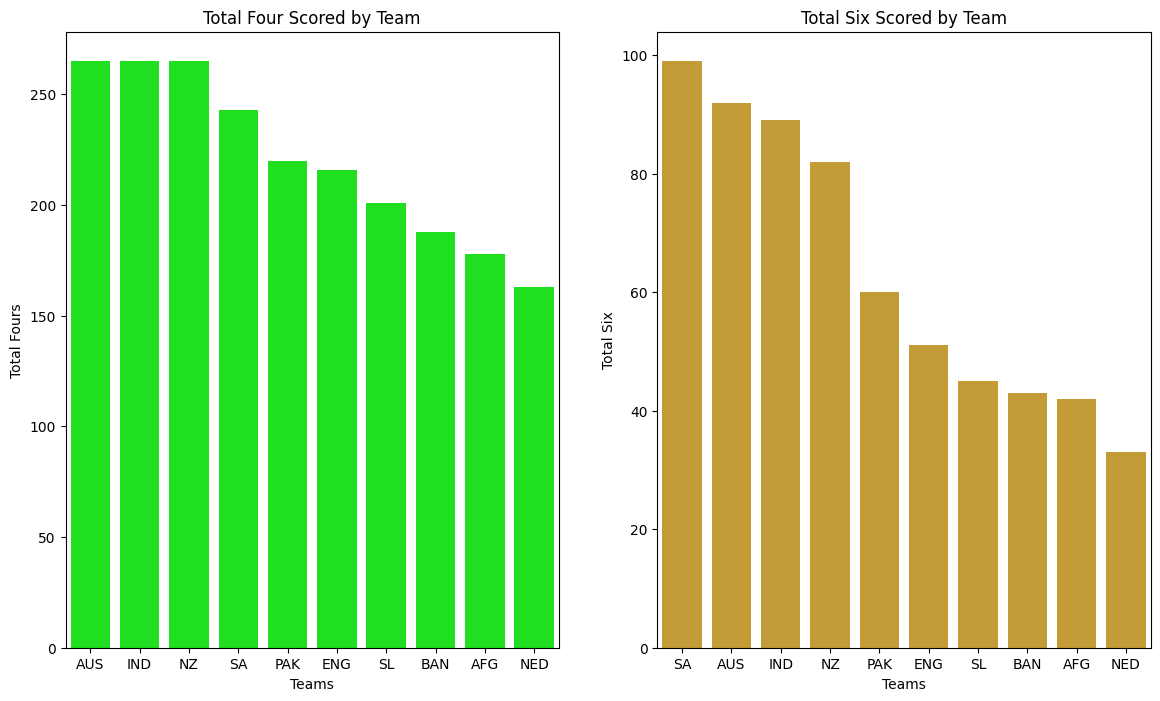

In [11]:
Total_4s_of_Team = pd.DataFrame(df.groupby(['team'])['4s'].sum().nlargest(10))
Total_6s_of_Team =  pd.DataFrame(df.groupby(['team'])['6s'].sum().nlargest(10))

plt.figure(figsize=(14,8))
plt.subplot(121)
sns.barplot(x='team', y = '4s', data = Total_4s_of_Team,color='lime')
plt.title('Total Four Scored by Team')
plt.ylabel('Total Fours')
plt.xlabel("Teams")

plt.subplot(122)
sns.barplot(x='team', y = '6s', data = Total_6s_of_Team,color='Goldenrod')
plt.title('Total Six Scored by Team')
plt.ylabel("Total Six")
plt.xlabel("Teams")

plt.show()

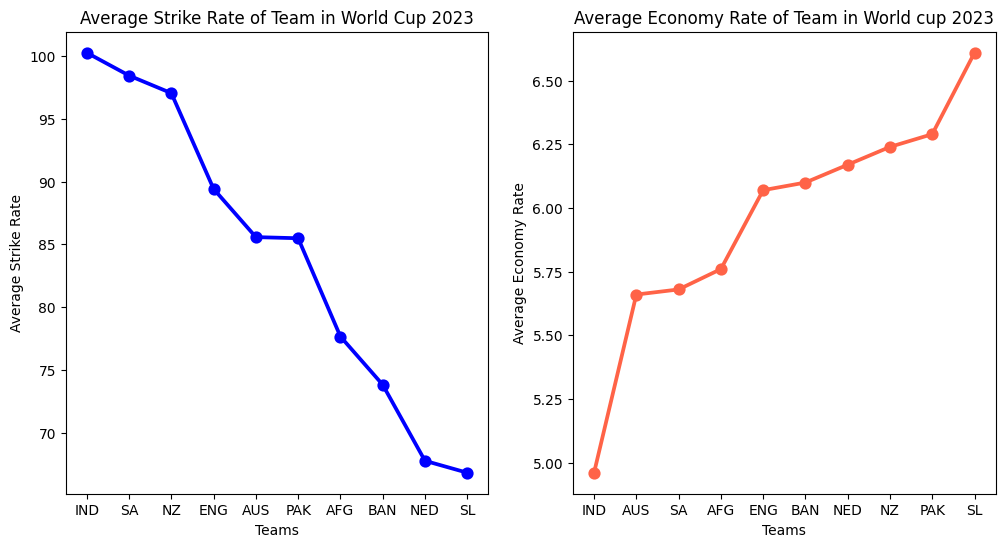

In [12]:
Team_Strike_rate = pd.DataFrame(df.groupby(['team']).sr.mean().round(2).nlargest(10))
Team_econ = pd.DataFrame(df.groupby(['team']).econ.mean().round(2).nsmallest(10))

plt.figure(figsize=(12,6))
plt.subplot(121)
sns.pointplot(x='team', y = 'sr', data = Team_Strike_rate,color='blue')
plt.title('Average Strike Rate of Team in World Cup 2023')
plt.ylabel('Average Strike Rate')
plt.xlabel("Teams")

plt.subplot(122)
sns.pointplot(x='team', y = 'econ', data = Team_econ,color='Tomato')
plt.title('Average Economy Rate of Team in World cup 2023')
plt.ylabel("Average Economy Rate")
plt.xlabel("Teams")

plt.show()

# 2. Player Performance 
### Explore Individual Player Performance

- Evaluate individual player statistics for both batting and bowling.
- Identify leading run-scorers and wicket-takers.
- Assess the impact of players on their team's performance.
- Also find which batsman has Highest score in world cup 

In [13]:
# Batting stats
# let's first separate batting columns from dataset

Player_bat_state = df[df['bat_or_bowl']== 'bat']
player_bowl_state = df[df['bat_or_bowl']== 'bowl']


In [14]:
# Batsman stats

batsman_player_performance = Player_bat_state[['runs','runs_per_ball','inns','4s','6s','sr']].describe()
print(batsman_player_performance.head())

             runs  runs_per_ball        inns          4s          6s  \
count  846.000000     846.000000  846.000000  846.000000  846.000000   
mean    27.158392       0.837168    1.463357    2.605201    0.751773   
std     30.991672       0.524755    0.498950    3.146922    1.504184   
min      0.000000       0.000000    1.000000    0.000000    0.000000   
25%      5.000000       0.516100    1.000000    0.000000    0.000000   

               sr  
count  846.000000  
mean    83.716596  
std     52.475444  
min      0.000000  
25%     51.610000  


In [15]:
# Bowler stats

bowl_player_performance = player_bowl_state[['wkts','overs','mdns', 'inns']].describe()
print(bowl_player_performance.head())

             wkts       overs        mdns        inns
count  562.000000  562.000000  562.000000  562.000000
mean     1.204626    7.342527    0.256228    1.482206
std      1.198237    2.679736    0.532547    0.500128
min      0.000000    0.300000    0.000000    1.000000
25%      0.000000    5.550000    0.000000    1.000000


### Top 10 Run scorer in world cup 

In [16]:
top_run_scorer = Player_bat_state.groupby('player')['runs'].sum().sort_values(ascending = False).head(10) 
top_run_scorer_df = top_run_scorer.to_frame().reset_index()
top_run_scorer_df.columns = ['Player', 'Total Runs']
print("Top run Scorers are: \n")
print(top_run_scorer_df)
print("******"*10)

Top run Scorers are: 

                   Player  Total Runs
0           V Kohli (IND)         711
1          Q de Kock (SA)         594
2         R Ravindra (NZ)         578
3        DJ Mitchell (NZ)         552
4         RG Sharma (IND)         550
5         DA Warner (AUS)         528
6           SS Iyer (IND)         526
7  HE van der Dussen (SA)         448
8          MR Marsh (AUS)         426
9         AK Markram (SA)         406
************************************************************


In [17]:
fig_top_player = px.bar(top_run_scorer_df, x ='Player', y = 'Total Runs', color_discrete_sequence = ['Purple'],title = 'Top 10 Run Scorers in World Cup 2023',
                       labels = {'Player':'Player Name', 'Total Runs': 'Runs Scored'})
fig_top_player.update_xaxes(title_text = 'Player Name')
fig_top_player.update_yaxes(title_text = 'Runs Scored')
fig_top_player.update_layout(xaxis_tickangle = -35)
fig_top_player.show()

### Top 10 Wicket Taker in World cup

In [18]:
top_Wicket_taker = player_bowl_state.groupby(['player'])['wkts'].sum().sort_values(ascending = False).head(10)
top_Wicket_taker_df = top_Wicket_taker.to_frame().reset_index()
top_Wicket_taker_df.columns = ['Player', 'wickets']
print("Top wicket takers: \n")
print(top_Wicket_taker_df)
print("******"*10)

Top wicket takers: 

                      Player  wickets
0       Mohammed Shami (IND)     23.0
1              A Zampa (AUS)     22.0
2          D Madushanka (SL)     21.0
3             G Coetzee (SA)     20.0
4  Shaheen Shah Afridi (PAK)     18.0
5            JJ Bumrah (IND)     18.0
6              M Jansen (SA)     17.0
7            MJ Santner (NZ)     16.0
8         BFW de Leede (NED)     16.0
9            RA Jadeja (IND)     16.0
************************************************************


In [19]:
#let's add some visualization
fig_top_wkt = px.bar(top_Wicket_taker_df, x = 'Player', y = 'wickets', color_discrete_sequence = ['Orange']
                    , title = 'Top 10 leading Wicket takers in World cup 2023',
                    labels = {'Player': 'Player Name', 'wickets': 'wickets Taken'})
fig_top_wkt.update_xaxes(title_text='Player Name')
fig_top_wkt.update_yaxes(title_text = 'Wickets taken')
fig_top_wkt.update_layout(xaxis_tickangle = -35)
fig_top_wkt.show()

### Highest Score by Batsman

In [20]:
top_10_highest_individual_scores = df.groupby(['player']).runs.max().nlargest(10)
top_10_highest_individual_scores_df = top_10_highest_individual_scores.to_frame().reset_index()
top_10_highest_individual_scores_df.columns = ['Player', 'Highest Scores']
print("Top 10 Highest Scores: \n")
print(top_10_highest_individual_scores_df)
print("******"*10)

Top 10 Highest Scores: 

                   Player  Highest Scores
0        GJ Maxwell (AUS)             201
1          MR Marsh (AUS)             177
2          Q de Kock (SA)             174
3         DA Warner (AUS)             163
4          DP Conway (NZ)             152
5          DJ Malan (ENG)             140
6        DJ Mitchell (NZ)             134
7  HE van der Dussen (SA)             133
8   Mohammad Rizwan (PAK)             131
9         RG Sharma (IND)             131
************************************************************


In [21]:
top_10_highest_individual_scores = df.groupby(['player']).runs.max().nlargest(10)

fig_highest_scores = px.bar(top_10_highest_individual_scores, color_discrete_sequence = ['violet'],
                        title = 'Top 10 Highest Individual Scorers in World Cup 2023',labels = {'Player':'Player Name', 'Total Runs': 'Runs Scored'})
fig_highest_scores.update_xaxes(title_text = 'Player Name')
fig_highest_scores.update_yaxes(title_text = 'Runs Scored')
fig_highest_scores.update_layout(xaxis_tickangle = -35)
fig_highest_scores.show()

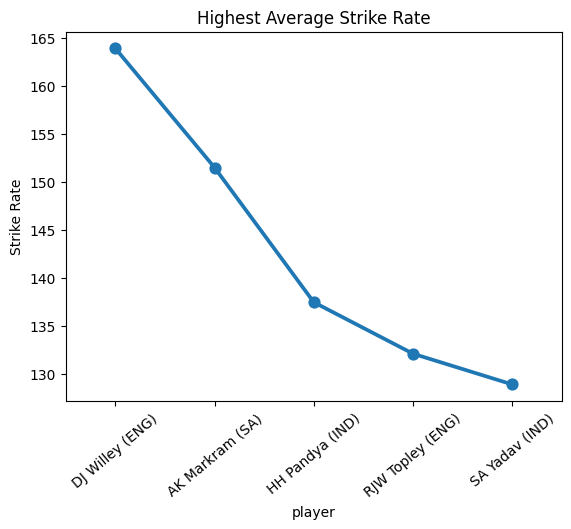

In [22]:
high_sr = Player_bat_state.groupby(['player']).sr.mean().nlargest(5).round(2)
sns.pointplot(high_sr)
plt.title("Highest Average Strike Rate")
plt.ylabel('Strike Rate')
plt.xticks(rotation= 40);

# Ground Analysis

In [23]:
ground_econ_rate = df.groupby(['ground']).econ.mean().round(2).nlargest(10)

fig_ground_econ_rate = px.line(ground_econ_rate,title='Average Economy Rate of Ground',color_discrete_sequence = ['navy'])
fig_ground_econ_rate.update_yaxes(title_text = 'Average Economy Rate')
fig_ground_econ_rate.update_xaxes(title_text = 'Ground')


In [24]:
fig_opposition = px.box(df, x='opposition', y='runs_per_ball', color='team',
                         title='Performance Against Different Oppositions',
                         labels={'runs_per_ball': 'Runs per Ball', 'opposition': 'Opposition'})
fig_opposition.update_xaxes(title_text='Opposition')
fig_opposition.update_yaxes(title_text='Runs per Ball')
fig_opposition.show()